In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

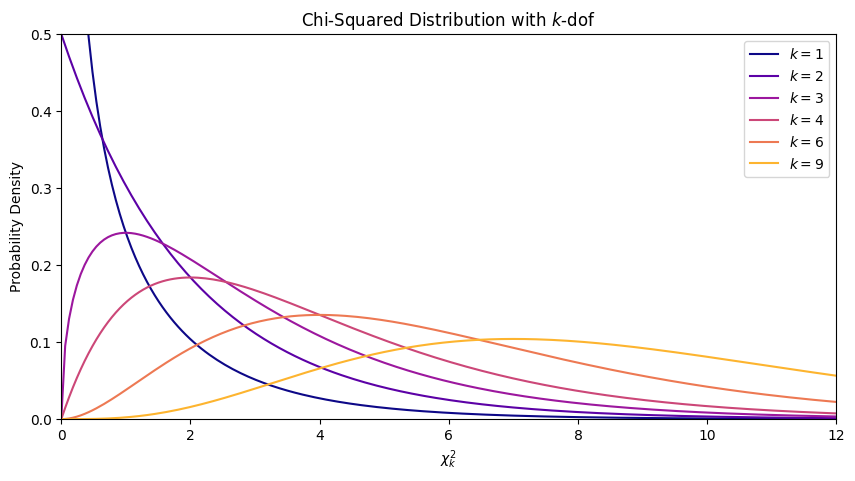

In [2]:
from mpltools import layout
from mpltools import color

fig, ax = plt.subplots(figsize=(10,5))


x = np.linspace(0, 12, 200)

ax.set_prop_cycle('color',[plt.cm.plasma(i) for i in np.linspace(0, 1, 7)])


for i in [1, 2, 3, 4,6,9]:
    ax.plot(x, chi2(i).pdf(x), '-', label=rf'$k={i}$')
    
    
ax.legend()
ax.set_xlabel(r'$\chi^2_k$')
ax.set_ylabel('Probability Density')
ax.set_ylim(0, 0.5)
ax.set_xlim(0, 12)
ax.set_title('Chi-Squared Distribution with $k$-dof')

plt.savefig('pdf.png', dpi=300, bbox_inches='tight')
    
plt.show()

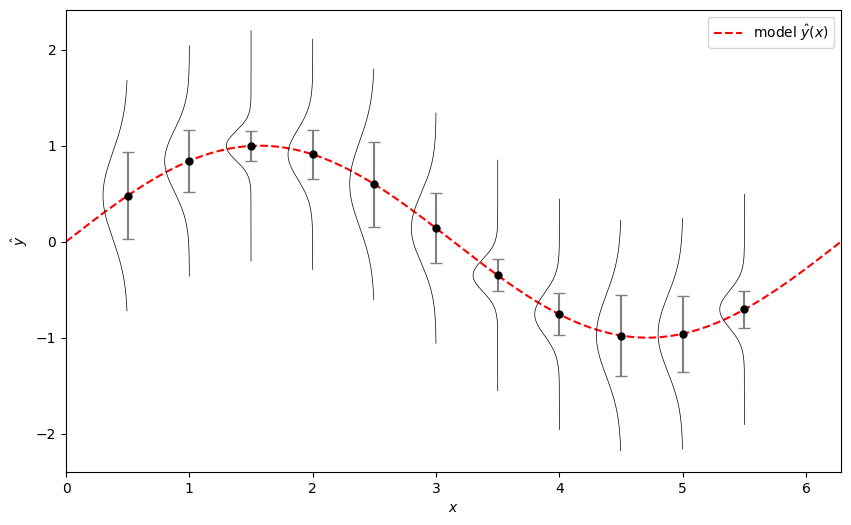

In [14]:
def draw_gaussian_at(support, sd=1.0, height=1.0, xpos=0.0, ypos=0.0, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    gaussian = np.exp((-support ** 2.0) / (2 * sd ** 2.0))
    gaussian /= gaussian.max()
    gaussian *= height
    return ax.plot(gaussian + xpos, support + ypos, **kwargs, lw=0.5)

support = np.linspace(-1.2, 1.2, 1000)
fig, ax = plt.subplots(figsize=(10,6))

x = np.linspace(0, 2*np.pi, 200)
ax.plot(x, np.sin(x), '--r', label=r'model $\hat{y}(x)$')

for each in np.linspace(0.5, 5.5, 11):
    sd = 0.3+0.15*np.sin(3*each)
    draw_gaussian_at(support, sd=sd, height=-0.2, xpos=each, ypos=np.sin(each), ax=ax, color='k')
    ax.plot(each, np.sin(each), '.k', lw=5, mew=3)
    ax.errorbar(each, np.sin(each), sd, ecolor='gray', capsize=4)
    
    
ax.set_xlim(0, 2*np.pi)
ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\hat{y}$')

plt.savefig('model.png', dpi=300, bbox_inches='tight')
plt.show()

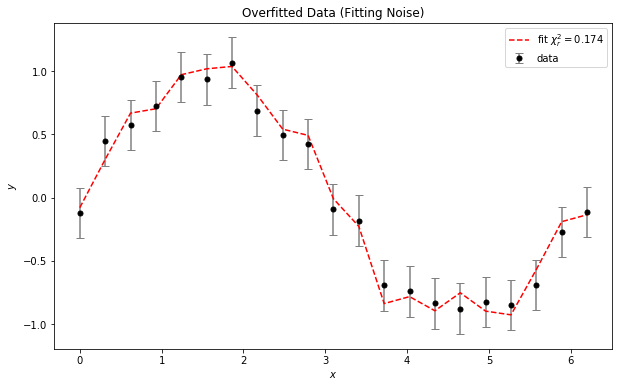

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

np.random.seed(55)

x = np.linspace(0, 2*np.pi, 200)
xx = np.linspace(0, 6.2, 21)
yy = np.sin(xx) + (np.random.rand(xx.size)-0.5)*0.3

y_fit = yy + (np.random.rand(xx.size)-0.5)*0.3

# ax.plot(x, np.sin(x))
chi = np.sum(((yy-y_fit)/.2)**2)/21
ax.plot(xx, y_fit, '--r', label=f'fit $\chi^2_r=${chi:.3f}')
ax.errorbar(xx, yy, .2, fmt='.k', ecolor='gray', capsize=4, label='data', markersize=10)

ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Overfitted Data (Fitting Noise)')

plt.savefig('over.png', dpi=300, bbox_inches='tight')
plt.show()

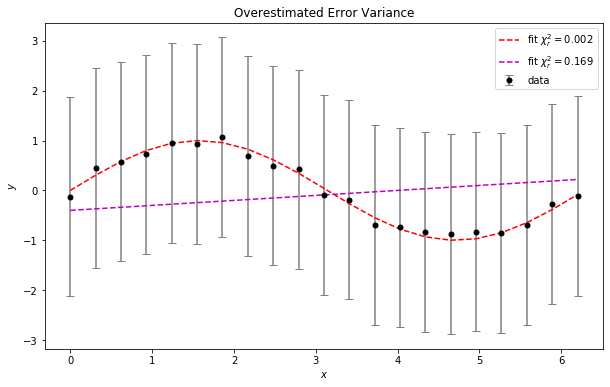

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

np.random.seed(55)

x = np.linspace(0, 2*np.pi, 200)
xx = np.linspace(0, 6.2, 21)
yy = np.sin(xx) + (np.random.rand(xx.size)-0.5)*0.3

y_fit_s = np.sin(xx)
y_fit_l = 0.1 * xx-0.4

# ax.plot(x, np.sin(x))
chi_s = np.sum(((yy-y_fit_s)/2)**2)/21
chi_l = np.sum(((yy-y_fit_l)/2)**2)/21

ax.plot(xx, y_fit_s, '--r', label=f'fit $\chi^2_r=${chi_s:.3f}')
ax.plot(xx, y_fit_l, '--m', label=f'fit $\chi^2_r=${chi_l:.3f}')
ax.errorbar(xx, yy, 2, fmt='.k', ecolor='gray', capsize=4, label='data', markersize=10)

ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Overestimated Error Variance')

plt.savefig('var.png', dpi=300, bbox_inches='tight')
plt.show()

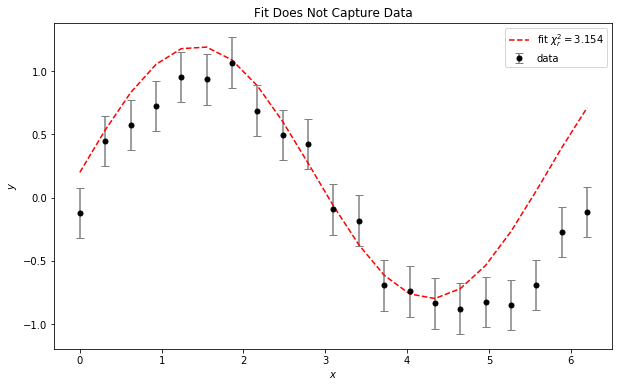

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

np.random.seed(55)

x = np.linspace(0, 2*np.pi, 200)
xx = np.linspace(0, 6.2, 21)
yy = np.sin(xx) + (np.random.rand(xx.size)-0.5)*0.3

y_fit_s = np.sin(1.1*xx)+.2

# ax.plot(x, np.sin(x))
chi_s = np.sum(((yy-y_fit_s)/.2)**2)/21

ax.plot(xx, y_fit_s, '--r', label=f'fit $\chi^2_r=${chi_s:.3f}')
ax.errorbar(xx, yy, .2, fmt='.k', ecolor='gray', capsize=4, label='data', markersize=10)

ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Fit Does Not Capture Data')

plt.savefig('bad.png', dpi=300, bbox_inches='tight')
plt.show()

[0.95401589 0.99933922 0.02251416]


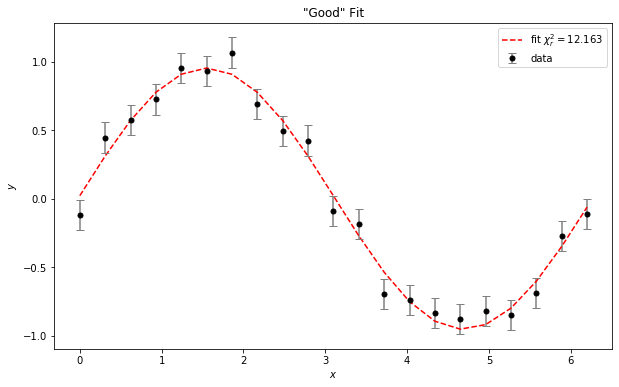

In [14]:
from scipy.optimize import curve_fit

def sin(x, a, omega, phi):
    return a*np.sin(omega*x + phi)

fig, ax = plt.subplots(figsize=(10,6))

np.random.seed(55)

x = np.linspace(0, 2*np.pi, 200)
xx = np.linspace(0, 6.2, 21)
yy = np.sin(xx) + (np.random.rand(xx.size)-0.5)*0.3

popt, cov = curve_fit(sin, xx, yy)
print(popt)

chi_s = np.sum(((yy-y_fit_s)/.11)**2)/(21-3)

ax.plot(xx, sin(xx, *popt), '--r', label=f'fit $\chi^2_r=${chi_s:.3f}')
ax.errorbar(xx, yy, .11, fmt='.k', ecolor='gray', capsize=4, label='data', markersize=10)

ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('"Good" Fit')

plt.savefig('good.png', dpi=300, bbox_inches='tight')
plt.show()

11.070497693516351


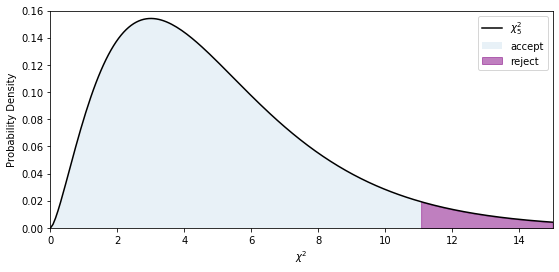

In [26]:
fig, ax = plt.subplots(figsize=(9,4))


x = np.linspace(0, 15, 200)

ax.plot(x, chi2(5).pdf(x), '-k', label=rf'$\chi^2_5$')
    
crit = chi2.ppf(0.95, df=5)
x = np.linspace(0, crit, 200)
ax.fill_between(x, chi2(5).pdf(x), 0, label='accept', alpha=0.1)
x = np.linspace(crit, 15, 200)
ax.fill_between(x, chi2(5).pdf(x), 0, label='reject', color='purple', alpha=0.5)

ax.legend()
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('Probability Density')
ax.set_ylim(0, 0.16)
ax.set_xlim(0, 15)

plt.savefig('critical.png', dpi=300, bbox_inches='tight')
print(crit)
    
plt.show()